In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from tqdm import tqdm
import pickle

import swimAD2 as ad2       
import time
import dwfconstants as dwfc
import threading

ad2.disconnect()            
# zoroku = ad2.connect(0)
# alice = ad2.connect(1)

In [2]:
#하나는 ch1: x,ch2: y 다른 하나는 ch1: x, ch2: z에 꽂을 것 

def sampling(time):
    # Priority on oscilloscope detection rata
    size = 8192
    rate = size/time
    return rate


min_freq = 10
max_freq = 100000
num_freq = 1000
rangee = 20
shape = dwfc.funcSine
amp = 1
freq = np.linspace(min_freq,max_freq,num_freq)

data = {}
for f in freq:
     data[round(f)] = "NA"

rate = sampling(.10)   

total_results = []

def measure(devices):
    ad2.config_oscilloscope(devices, range0=rangee, range1=rangee, sample_rate=rate)
    result = []
    for f in tqdm(list(data.keys())):
        ad2.config_wavegen(devices, frequency=f, amplitude=amp, signal_shape=shape)
        ad2.start_wavegen(devices, channel=0)
        time.sleep(0.1)
        t0, ch1, ch2 = ad2.measure_oscilloscope(devices)
        ad2.stop_wavegen(devices, channel=0)
        ad2.reset_wavegen(devices, channel=0)
        time.sleep(0.1)
        result.append([f, t0, ch1, ch2])
    total_results.append(result)

def main():
    threads = []
    for devices in [zoroku, alice]:
        thread = threading.Thread(name=devices, target=measure, args=(devices,))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()

main()

100%|██████████| 1000/1000 [05:16<00:00,  3.16it/s]


[1.00000000e+01 1.10090090e+02 2.10180180e+02 3.10270270e+02
 4.10360360e+02 5.10450450e+02 6.10540541e+02 7.10630631e+02
 8.10720721e+02 9.10810811e+02 1.01090090e+03 1.11099099e+03
 1.21108108e+03 1.31117117e+03 1.41126126e+03 1.51135135e+03
 1.61144144e+03 1.71153153e+03 1.81162162e+03 1.91171171e+03
 2.01180180e+03 2.11189189e+03 2.21198198e+03 2.31207207e+03
 2.41216216e+03 2.51225225e+03 2.61234234e+03 2.71243243e+03
 2.81252252e+03 2.91261261e+03 3.01270270e+03 3.11279279e+03
 3.21288288e+03 3.31297297e+03 3.41306306e+03 3.51315315e+03
 3.61324324e+03 3.71333333e+03 3.81342342e+03 3.91351351e+03
 4.01360360e+03 4.11369369e+03 4.21378378e+03 4.31387387e+03
 4.41396396e+03 4.51405405e+03 4.61414414e+03 4.71423423e+03
 4.81432432e+03 4.91441441e+03 5.01450450e+03 5.11459459e+03
 5.21468468e+03 5.31477477e+03 5.41486486e+03 5.51495495e+03
 5.61504505e+03 5.71513514e+03 5.81522523e+03 5.91531532e+03
 6.01540541e+03 6.11549550e+03 6.21558559e+03 6.31567568e+03
 6.41576577e+03 6.515855

C:\Users\pete329\AppData\Local\Temp\ipykernel_32692\1057405759.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 8))


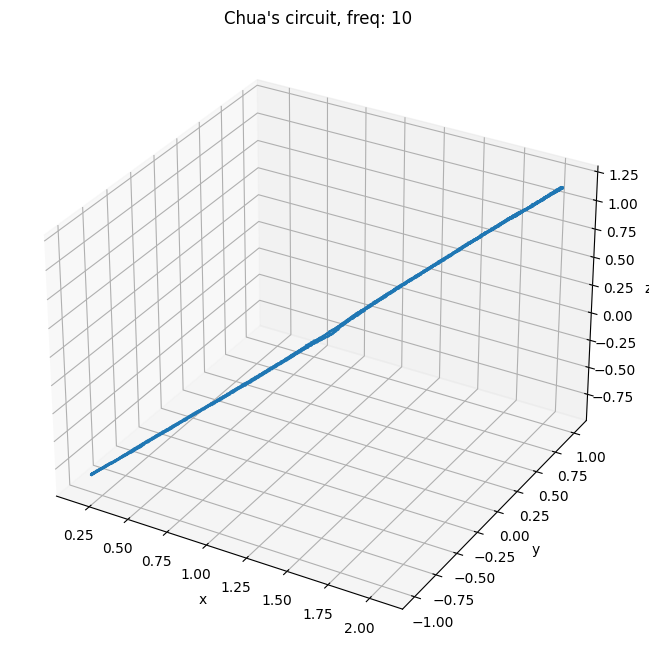

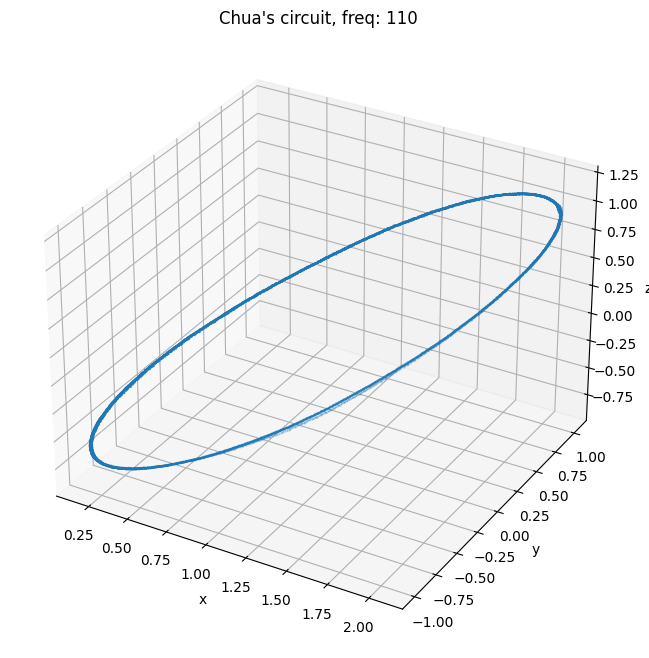

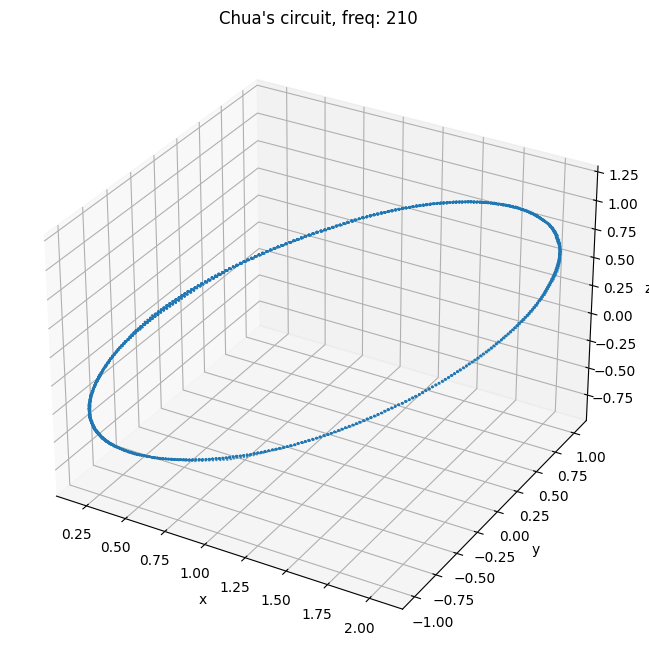

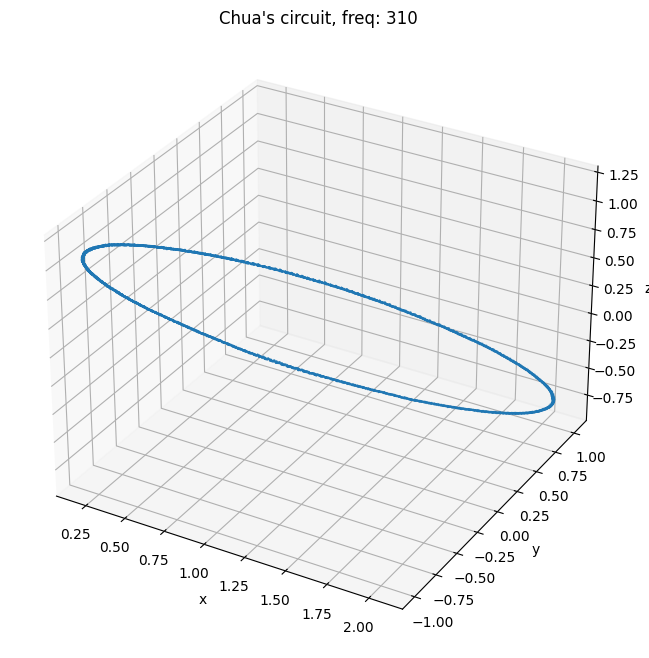

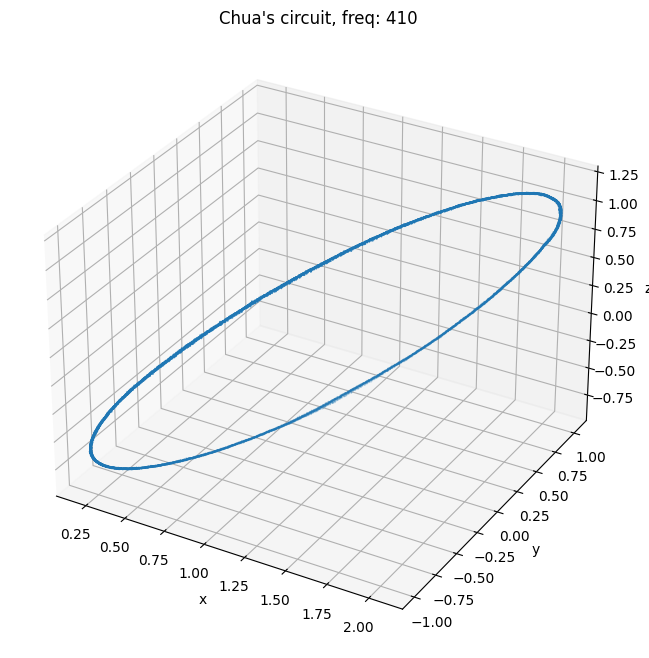

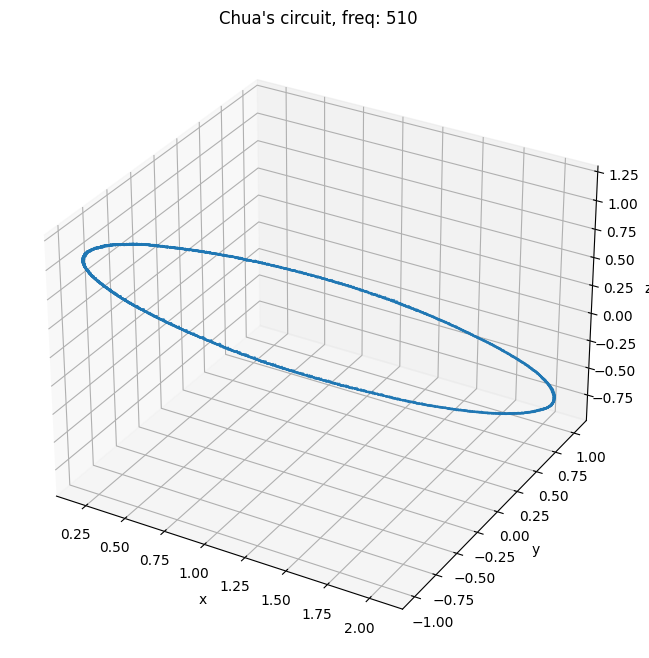

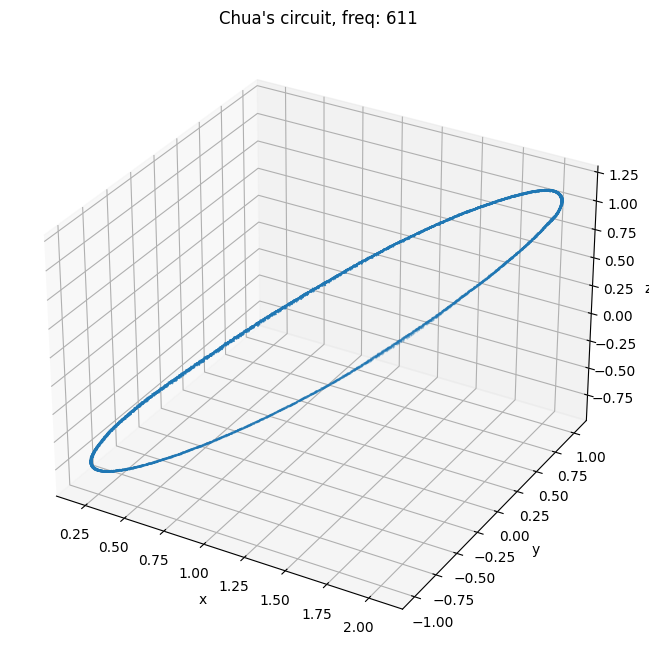

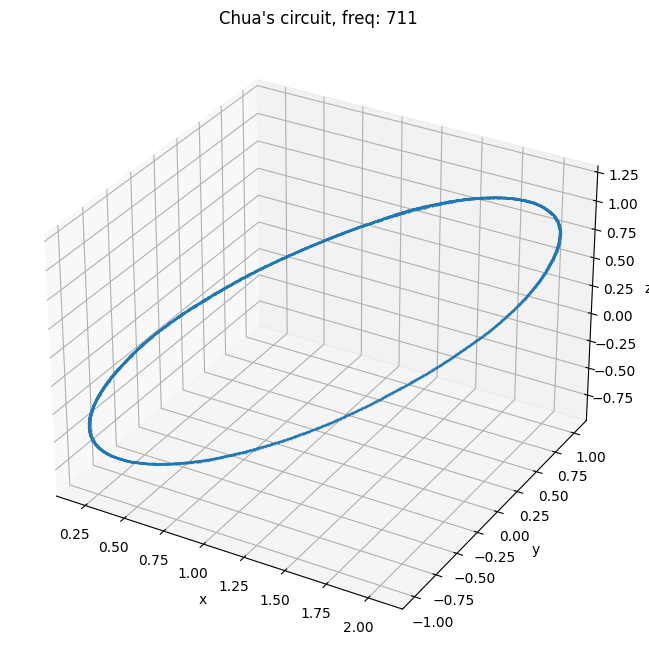

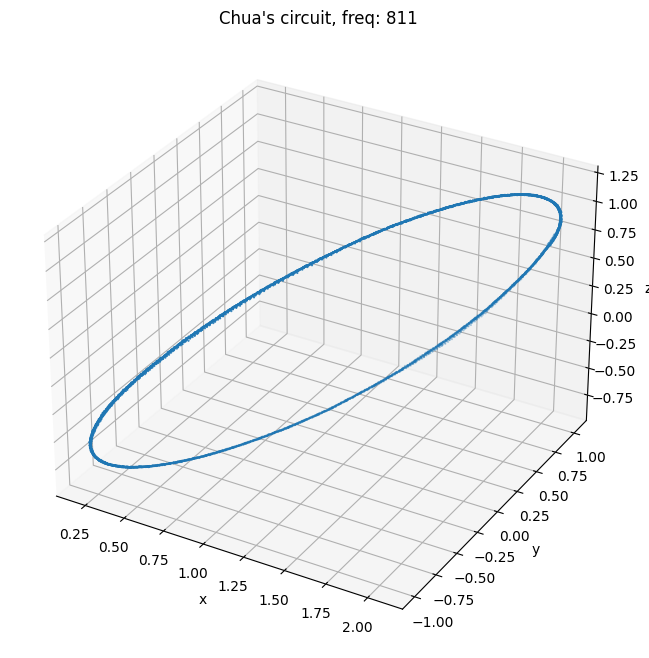

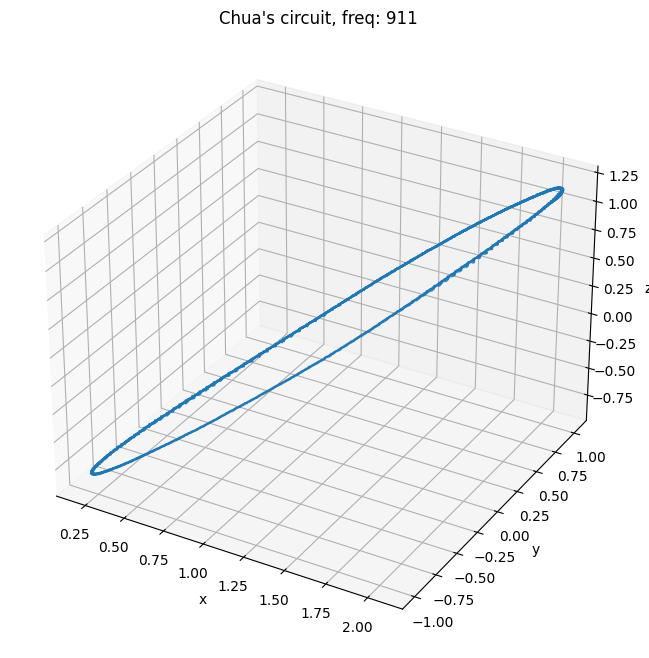

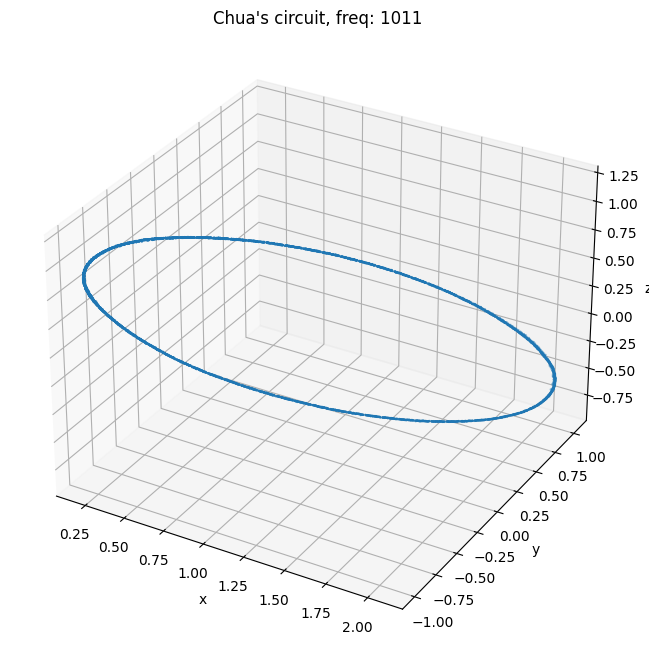

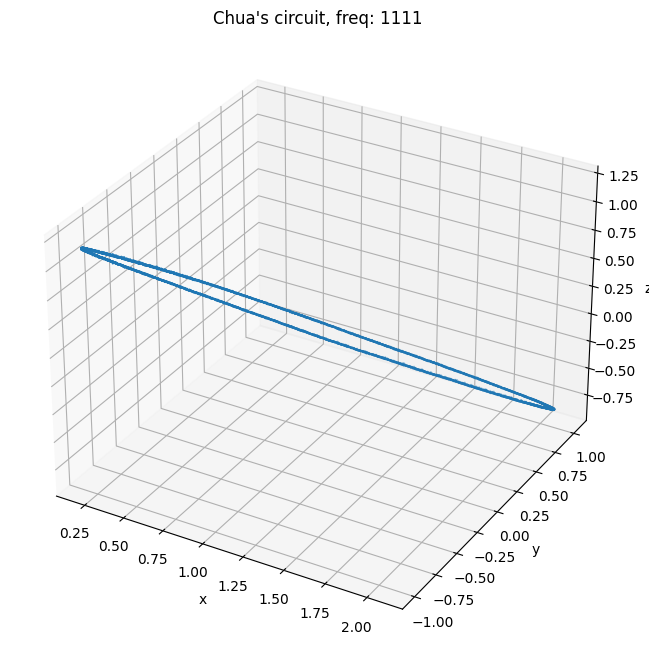

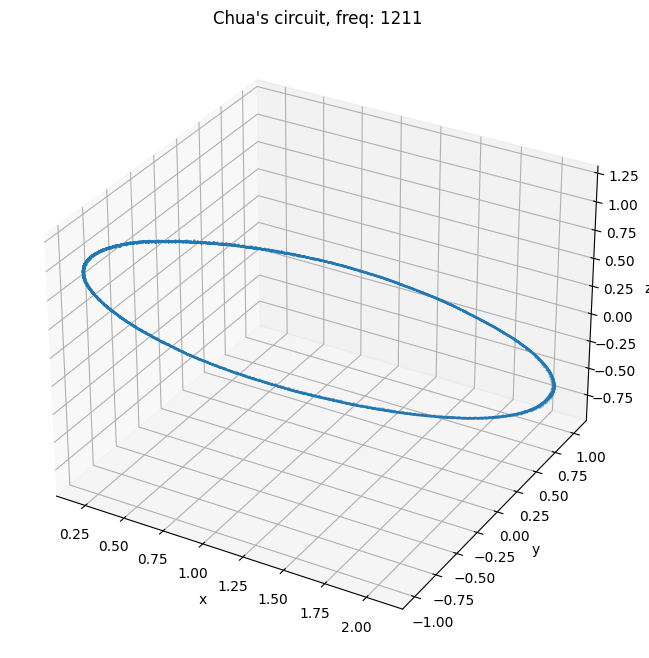

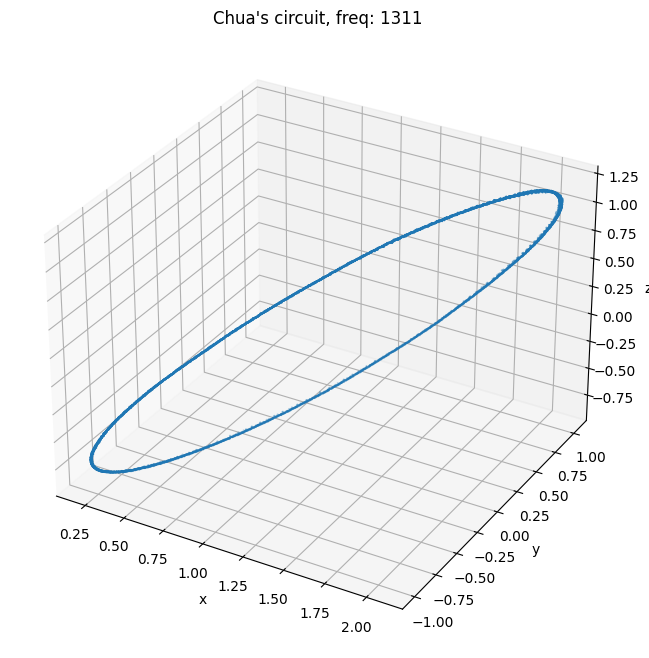

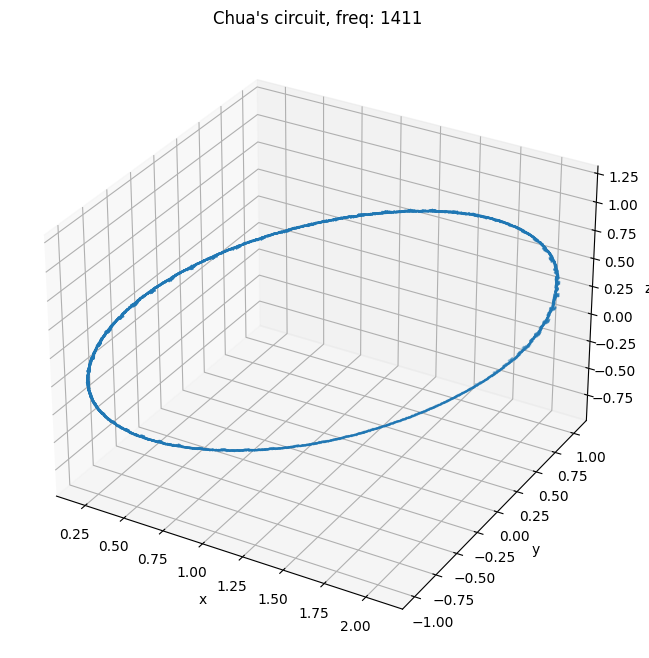

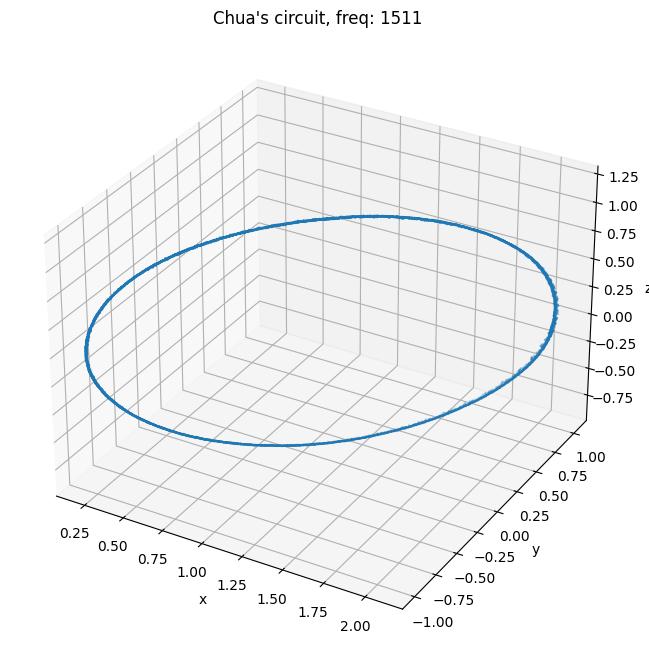

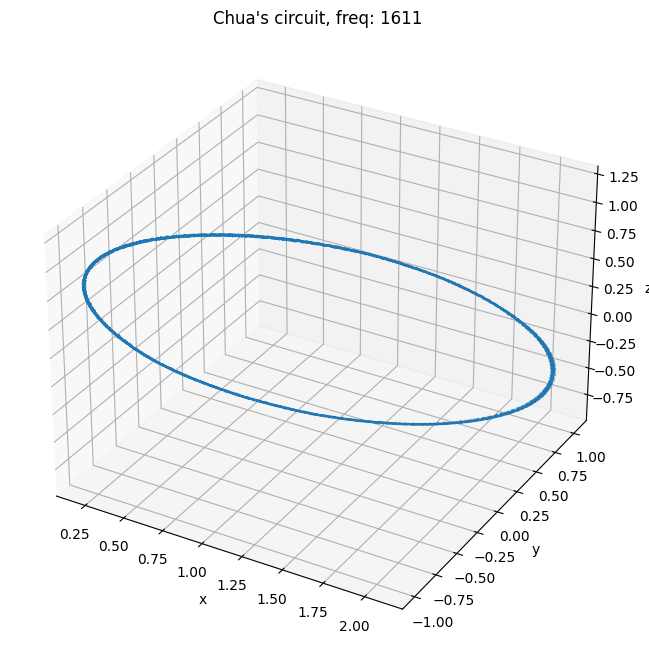

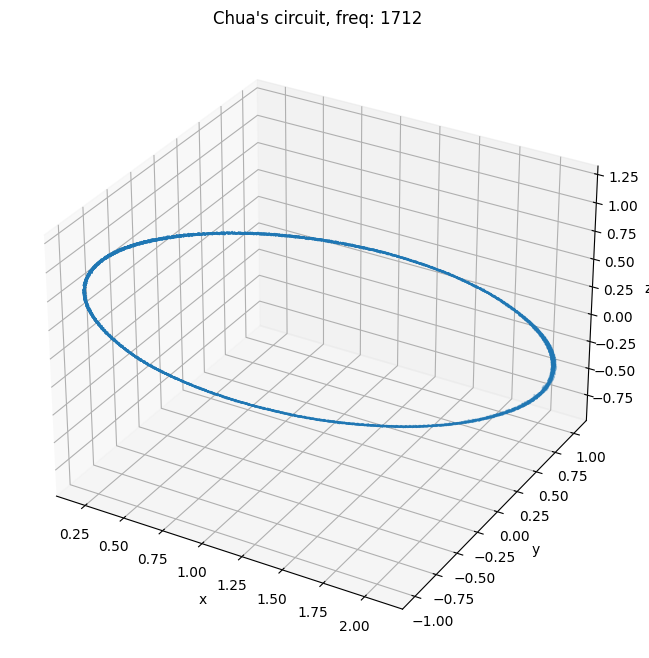

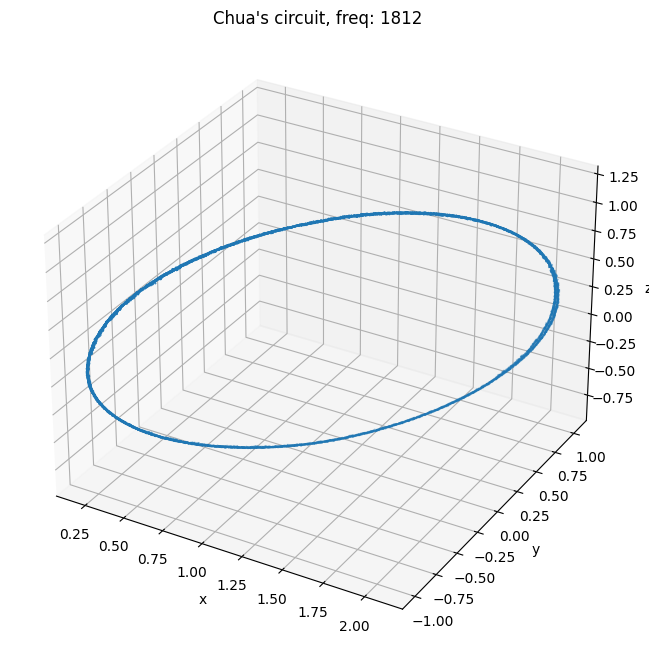

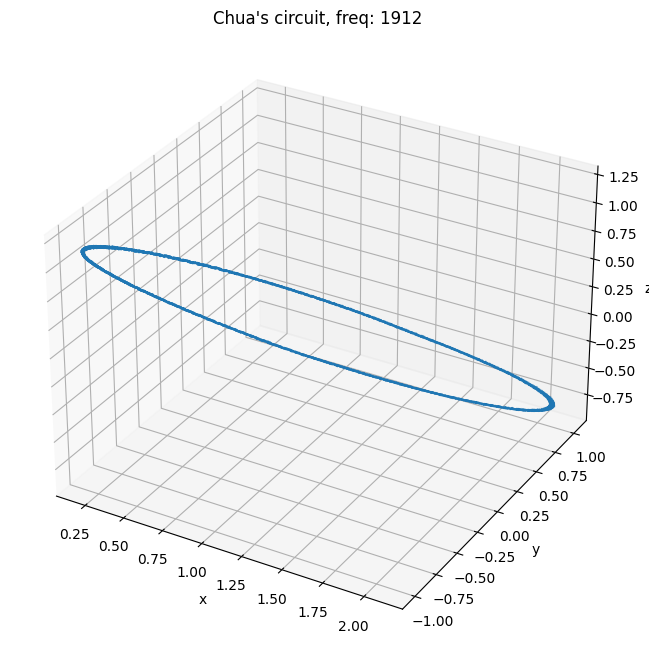

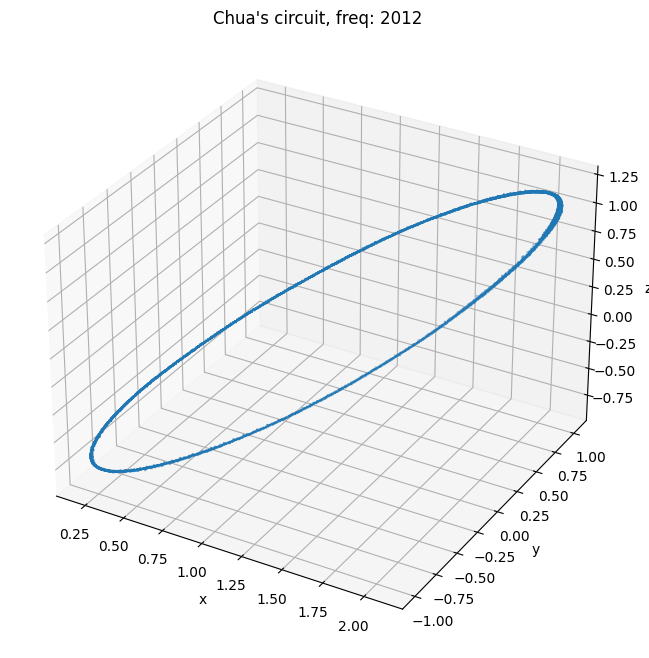

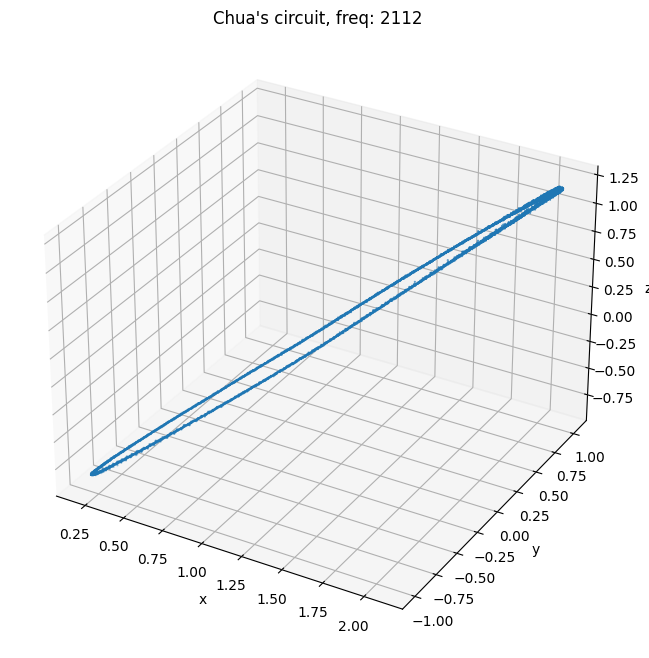

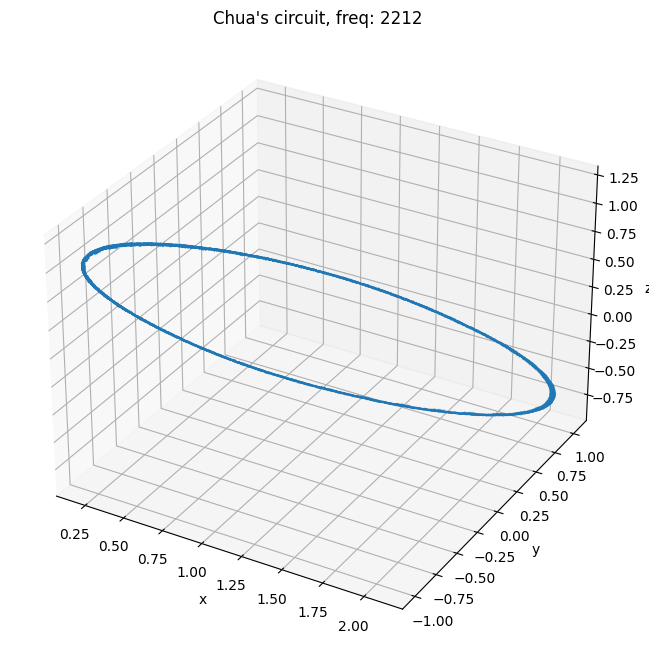

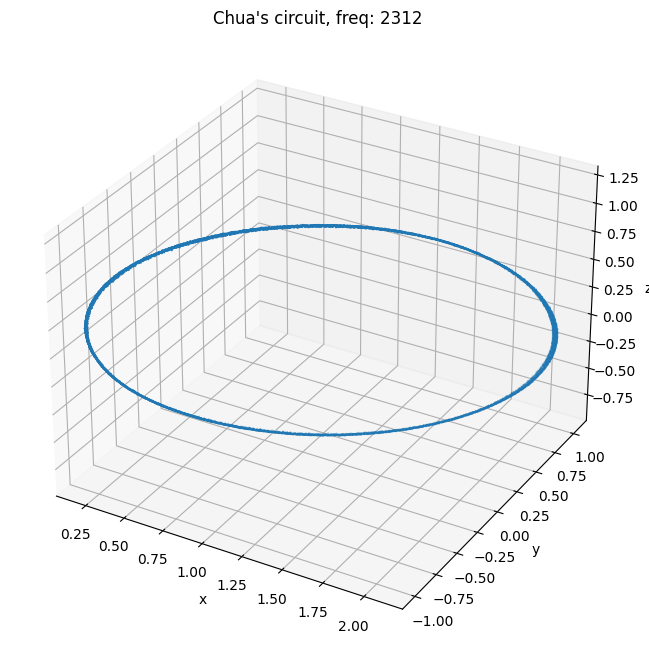

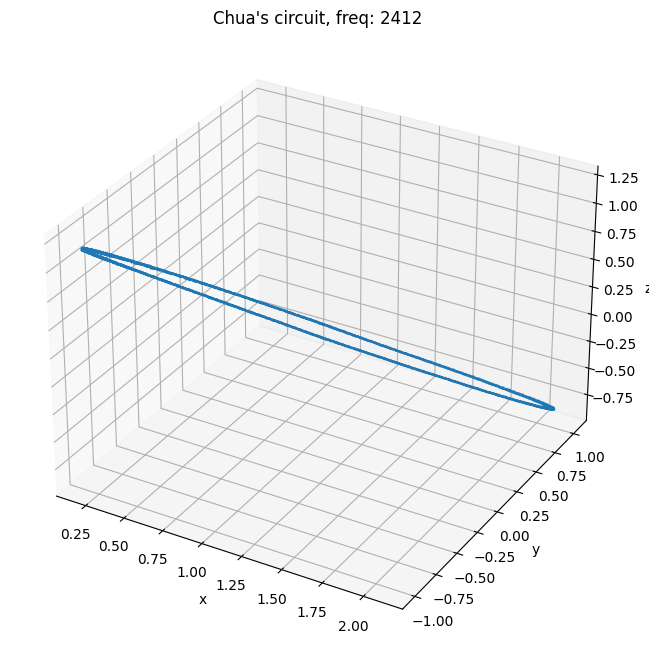

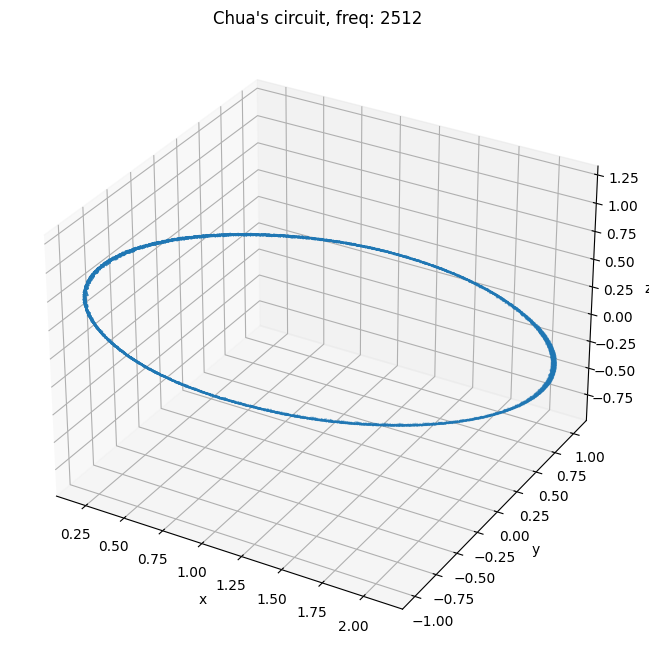

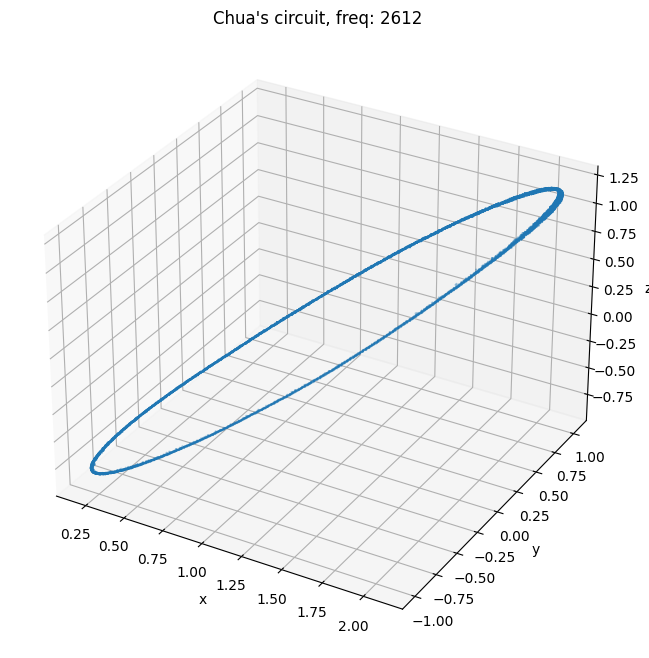

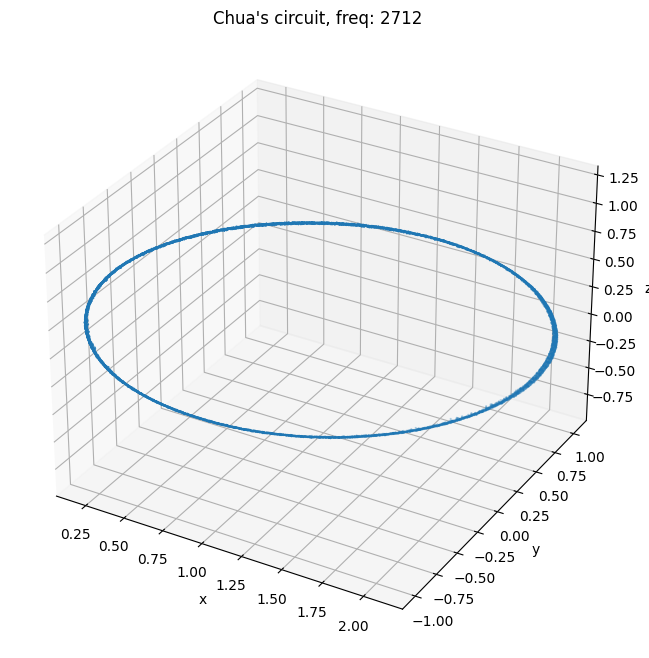

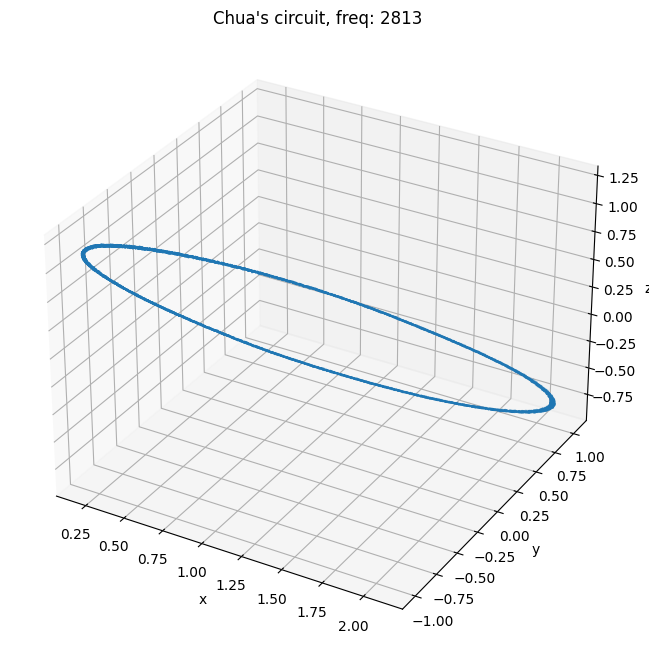

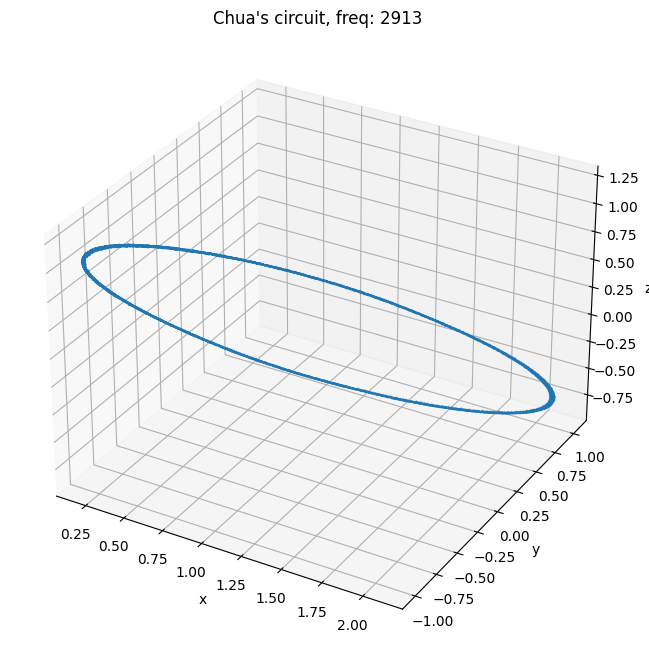

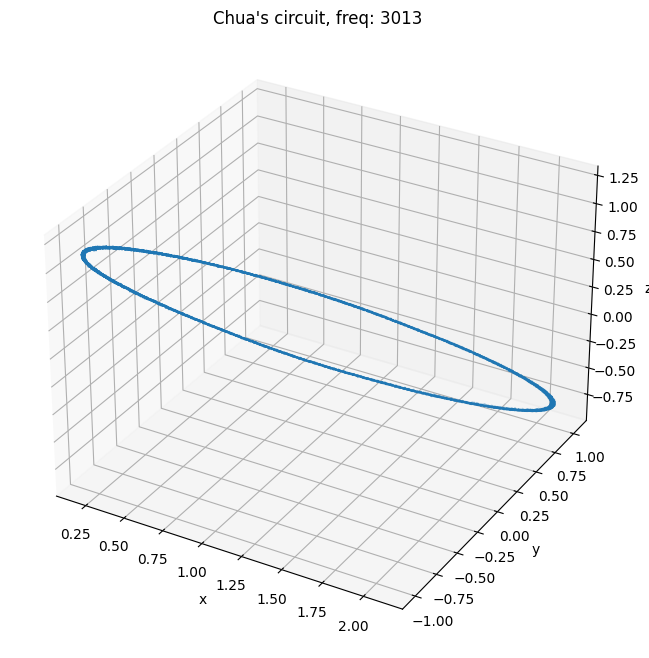

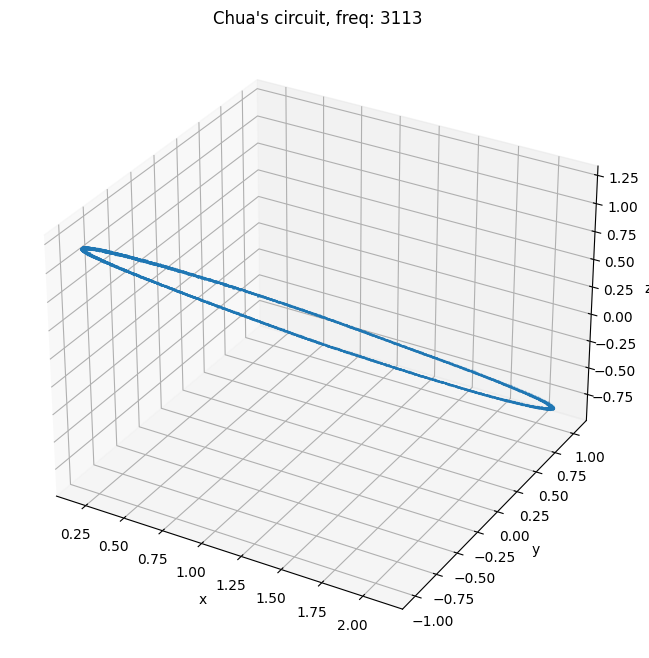

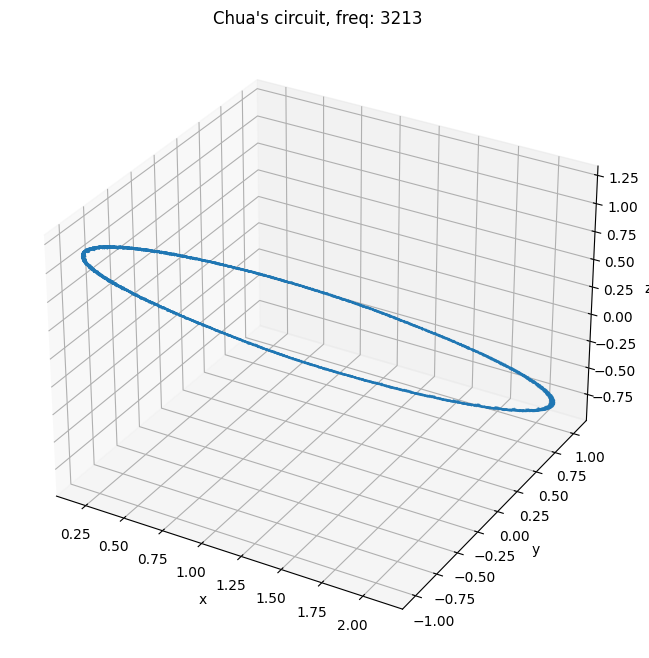

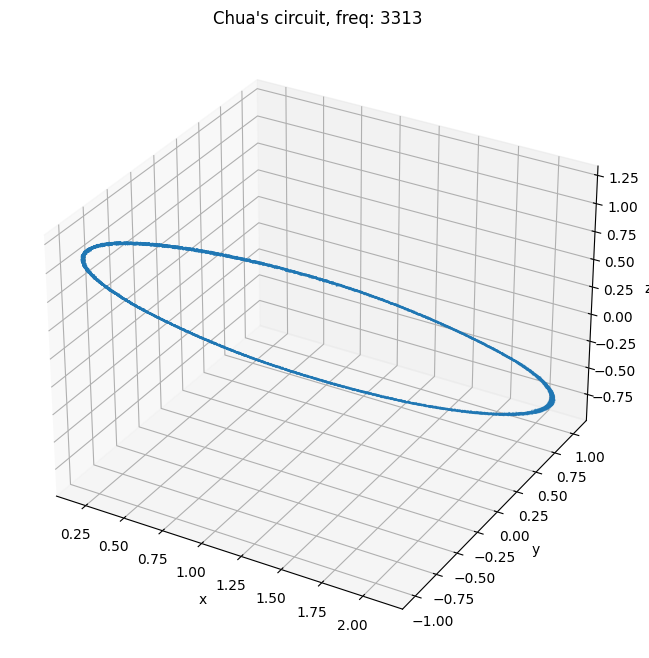

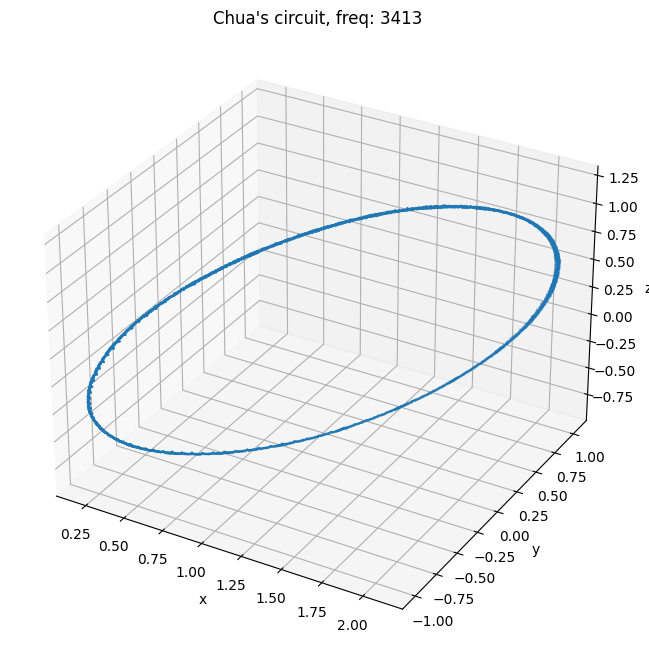

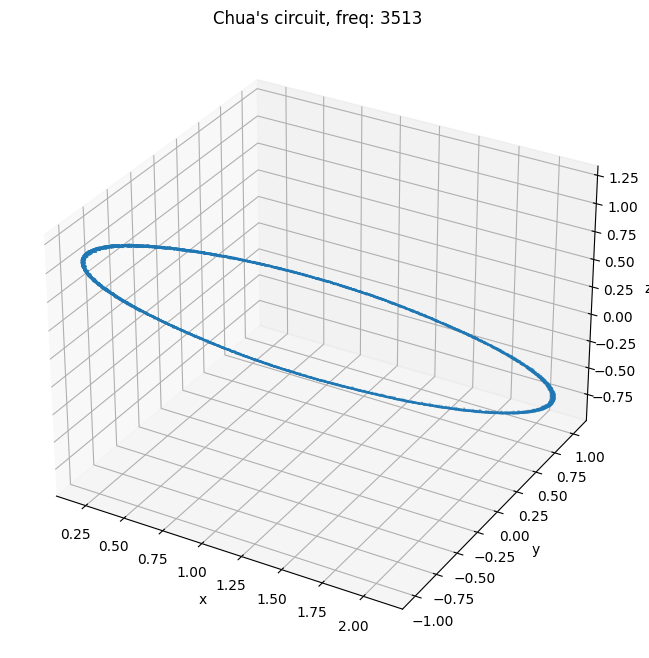

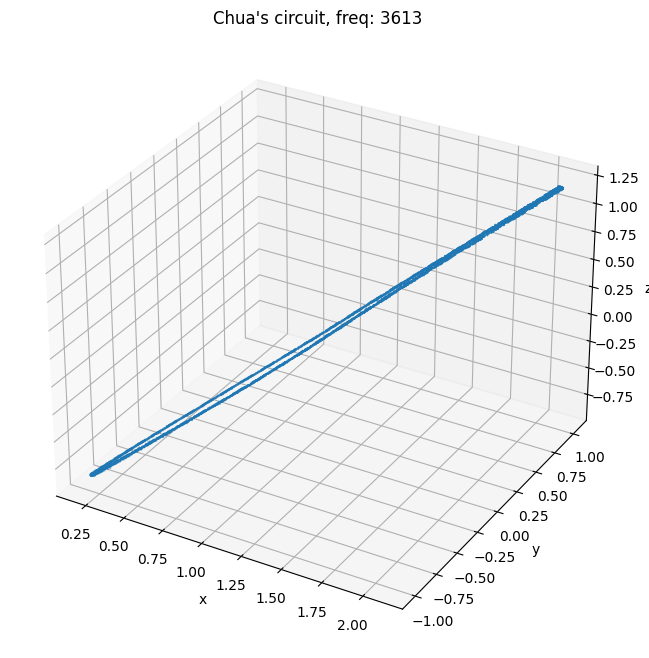

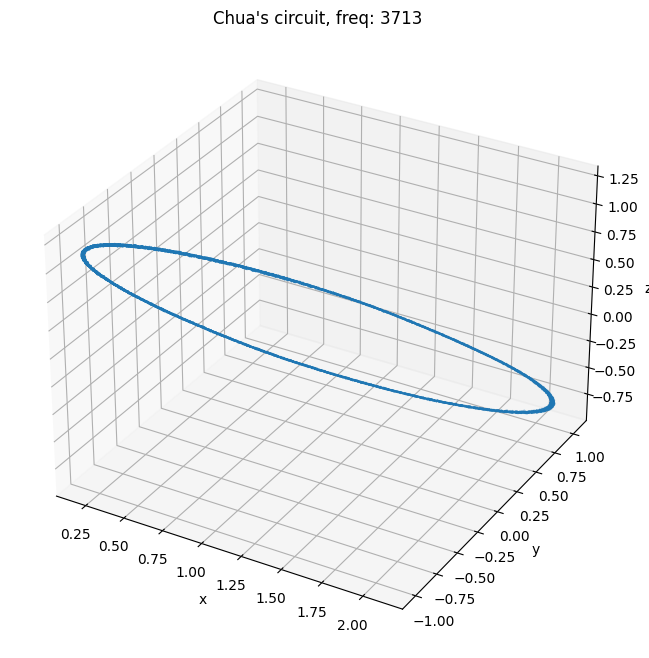

Error in callback <function flush_figures at 0x0000017BD5D07D80> (for post_execute):


KeyboardInterrupt: 

In [3]:
print(freq)
for i in range(len(freq)):
    print(i)
for i in range(len(freq)):
    xyz = [total_results[0][i][0], total_results[0][i][2], total_results[0][i][3], total_results[1][i][3]]
    # xyz is [frequency, x-list, y-list, z-list]
    fig = plt.figure(figsize=(8, 8))
    grid = gs.GridSpec(1, 1, wspace=0.1)
    plot3D = fig.add_subplot(grid[0, 0], projection='3d')
    plot3D.scatter(xyz[1], xyz[2], xyz[3], s=0.3)
    plot3D.set_xlabel("x")
    plot3D.set_ylabel("y")
    plot3D.set_zlabel("z")
    plot3D.set_title("Chua's circuit, freq: " + str(xyz[0]))
    plt.savefig('./result/amp_' + str(amp) + '_freq_' + str(xyz[0]) + '.png')